# Машинное обучение, DS-поток
## Задание ML.2

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 20 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 20 баллов;
* Задача 5 &mdash; 150 баллов.

----

In [ ]:
# Bot check

# HW_ID: ds_ml2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

sns.set(palette='Set2')

---
### Задача 1.

Во взвешенном методе наименьших квадратов каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет следующий вид: $$\sum\limits_{i=1}^n w_i(y_i - x_i^T\theta)^2 \rightarrow \min\limits_{\theta \in \mathbb{R}}$$

Найдите решение задачи в матричном виде.

Далее для удобства рассматриваем диагональную матрицу $W$ такую, что $w_i=W_{ii}$, а матрицу $x$ будем обозначать стандартным образом заглавной буквой.

Функция имеет вид:

$$
f(\theta)=(y-X^T\theta)^T W(y-X^T\theta)
$$

По правилам матричного дифференцирования (учитывая $W^T=W$) находим:

$$
\nabla_\theta f(\theta)=-2XW(y-X^T\theta)
$$

Теперь остаётся приравнять градиент к нулевому вектору:

$$
\nabla_\theta f=0\Rightarrow XWX^T\theta=XWy\Rightarrow \theta=(XWX^T)^{-1}XWy
$$

---
### Задача 2.

Рассмотрим модель логистической регрессии. Признаки объекта представимы в виде $d$-мерного вектора $x \in \mathbb{R}^d$, класс имеет бернулиевское распределение $Y \sim Bern(\mu_\theta(x))$. Мы делаем следующее предположение о зависимости параметра вероятности от признаков 
$${\mu_\theta(x) = \sigma(x^T\theta)= \cfrac{1}{1 + e^{-x^T\theta}}}.$$

Зададим регуляризацию через минимизацию следующего функционала:

$${F(\theta) = -\log L_{Y}(\theta) + \lambda \|\theta\|_2^2},$$

где ${L_{Y}(\theta)}$ &mdash; функция правдоподобия.

Опишите процесс оптимизации методами GD, SGD и IRLS.

$$
L_Y(\theta)=\prod_{i=1}^n \mathsf{P}(Y_i\vert \theta)=\prod_{i=1}^n \left(Y_i\mu_\theta(x)+(1-Y_i)(1-\mu_\theta(x))\right)
$$

$$
\log L_Y(\theta)=\sum_{i=1}^n \log\left(Y_i\mu_\theta(x)+(1-Y_i)(1-\mu_\theta(x))\right)
$$

$$
\nabla_\theta \mu_\theta(x)=\mu_\theta(x)(1-\mu_\theta(x))x
$$

$$
\nabla_\theta F(\theta)=-\sum_{i=1}^n \frac{(2Y_i-1)\mu_\theta(x)(1-\mu_\theta(x))x}{Y_i\mu_\theta(x)+(1-Y_i)(1-\mu_\theta(x))}+2\lambda\theta
$$

Оптимизация методом GD применяет стандартное выражение:

$$
\theta_{k+1}=\theta_{k}-\eta\nabla_\theta F(\theta_k)
$$

Для SGD мы на каждой итерации берём выборку $Y$ из $\mathrm{Bern}(\mu_{\theta_k}(x))$ и производим переход с вычислением градиента на основе данной выборки

---
### Задача 3.

Исследуем логистическую регрессию на простых примерах. С помощью кода ниже сгенерируйте данные, состоящие из одного вещественного признака и бинарного таргета.

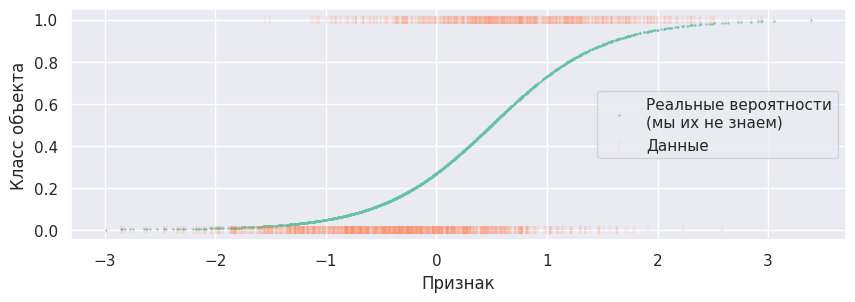

In [2]:
sample_size = 2000

# Признаки
X = np.random.normal(size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2*X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker='.', s=1, label='Реальные вероятности\n(мы их не знаем)')
plt.scatter(X, y, marker='|', alpha=0.1, label='Данные')
plt.xlabel('Признак')
plt.ylabel('Класс объекта')
plt.legend()

Обучите логистическую регрессию, используя реализацию из sklearn, при этом
* свободный коэффициент должен присутствовать в модели,
* регуляризацию использовать не нужно.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)

model = LogisticRegression(penalty=None, fit_intercept=True, random_state=42)
model.fit(X, y)

LogisticRegression(penalty=None, random_state=42)

Напечатайте оценку коэффициентов

In [43]:
model.coef_

array([[1.88131626]])

Ниже объявлена сетка значений признака. По этой сетке постройте
* предсказания классов,
* предсказания вероятностей класса 1.

Визуализируйте эти предсказания. На график стоит нанести также обучающую выборку.

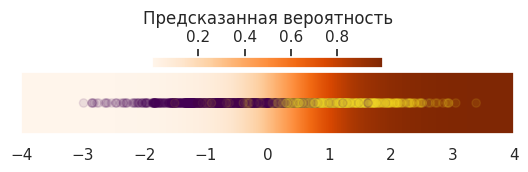

In [61]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
prob_grid = model.predict_proba(X_grid)[:, 1].reshape((1, 10000))
plt.figure(figsize=(18, 1))
plt.imshow(prob_grid, cmap='Oranges', interpolation='bicubic', extent=(-4, 4, -0.5, 0.5))
plt.colorbar(location='top', label='Предсказанная вероятность')
plt.scatter(X, np.zeros(X.shape), c=y, cmap='viridis', alpha=0.1)
plt.grid(visible=False)
plt.yticks([])
plt.show()

Разбейте отрезок $[-4, 4]$ на одинаковые бины длины порядка 0.2 и посчитайте в каждом бине долю объектов класса 1. Полученные значения добавьте на график предсказаний вероятностей и сравните эти графики. Проинтерпретируйте полученные результаты.

*Подсказка:* может помочь `np.digitize` и метод `groupby` для таблиц `pandas`.

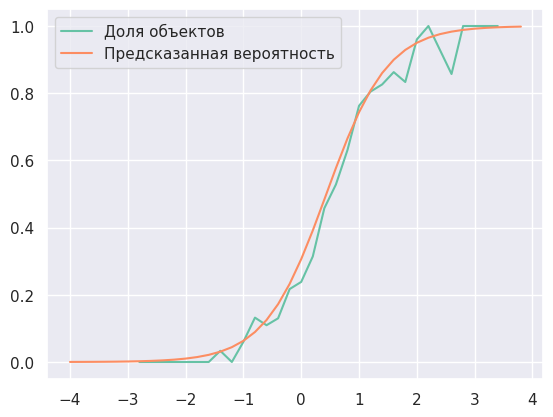

In [78]:
bins = np.arange(-4, 4, 0.2)
df = pd.DataFrame({'bin': np.digitize(X, bins).reshape((-1, )), 'y': y}).groupby('bin').mean()
df.index = bins[df.index]
plt.plot(df, label='Доля объектов')
plt.plot(bins, model.predict_proba(bins.reshape((-1, 1)))[:, 1], label='Предсказанная вероятность')
plt.legend()
plt.show()

Повторите проведенное исследование для следующих данных и сравните результаты.

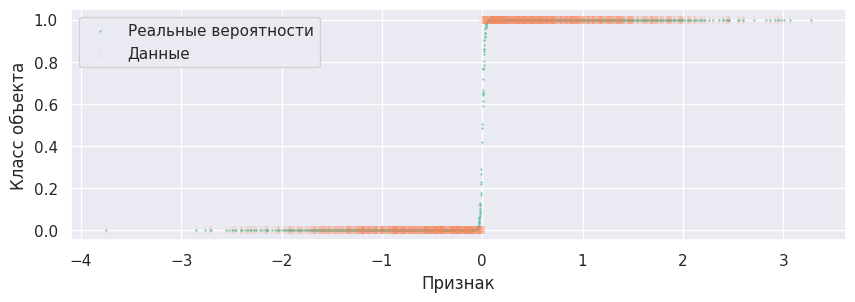

In [79]:
# Признаки
X = np.random.normal(size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(-100*X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker='.', s=1, label='Реальные вероятности')
plt.scatter(X, y, marker='|', alpha=0.1, label='Данные')
plt.xlabel('Признак')
plt.ylabel('Класс объекта')
plt.legend()

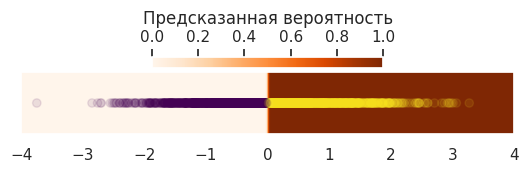

In [80]:
model.fit(X, y)
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
prob_grid = model.predict_proba(X_grid)[:, 1].reshape((1, 10000))
plt.figure(figsize=(18, 1))
plt.imshow(prob_grid, cmap='Oranges', interpolation='bicubic', extent=(-4, 4, -0.5, 0.5))
plt.colorbar(location='top', label='Предсказанная вероятность')
plt.scatter(X, np.zeros(X.shape), c=y, cmap='viridis', alpha=0.1)
plt.grid(visible=False)
plt.yticks([])
plt.show()

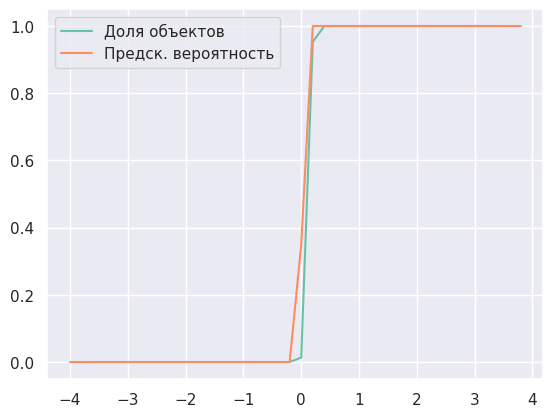

In [82]:
bins = np.arange(-4, 4, 0.2)
df = pd.DataFrame({'bin': np.digitize(X, bins).reshape((-1, )), 'y': y}).groupby('bin').mean()
df.index = bins[df.index]
plt.plot(df, label='Доля объектов')
plt.plot(bins, model.predict_proba(bins.reshape((-1, 1)))[:, 1], label='Предск. вероятность')
plt.legend()
plt.show()

Исследуйте, как меняются предсказания для второго датасета при наличии регуляризации.

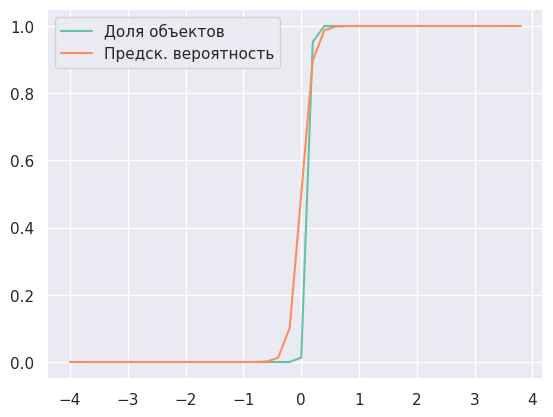

In [85]:
model.set_params(penalty='l2')
model.fit(X, y)
bins = np.arange(-4, 4, 0.2)
df = pd.DataFrame({'bin': np.digitize(X, bins).reshape((-1, )), 'y': y}).groupby('bin').mean()
df.index = bins[df.index]
plt.plot(df, label='Доля объектов')
plt.plot(bins, model.predict_proba(bins.reshape((-1, 1)))[:, 1], label='Предск. вероятность')
plt.legend()
plt.show()

**Выводы:** В данном случае логистическая регрессия выступает неплохой моделью для классификации: вероятности, предсказанные моделью, оказываются близки к истинной доле объектов класса. Регуляризация сглаживает график, что в исследуемом случае ухудшило точность классификации, т.к. сами данные имеют достаточно резкую границу между классами.

---
### Задача 4.

Сгенерируем данные, состоящие из двух бинарных признаков и бинарного таргета

In [86]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype='>i8').view(np.uint8), axis=1)[:, -3:],
    columns=['x1', 'x2', 'y'],
)
data.head()

,x1,x2,y
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,0


Особенность таких данных &mdash; конечное число *возможных различных* объектов. В данном случае их всего 4, по количеству всех возможных комбинаций значений признака. Соответственно, любой моделью мы можем сделать только 4 различных предсказания. Исследуем, как с этим справляется логистическая регрессия.

Сначала для сравнения посчитайте долю класса 1 для каждой категории объектов.

*Подсказка:* используйте `pivot_table`.

In [88]:
data.pivot_table(index=['x1'], columns=['x2'], values=['y'], aggfunc='mean')

y          
x2         0         1
x1                    
0   0.486826  0.274588
1   0.039440  0.443396

Обучите логистическую регрессию и получите предсказания вероятностей для этих четырех типов объектов. Представьте результаты в таком виде, чтобы их удобно было сравнивать с частотами, посчитанными ранее. 

In [91]:
model = LogisticRegression(random_state=42)
model.fit(data[['x1', 'x2']], data['y'])

LogisticRegression(random_state=42)

In [92]:
model.coef_

array([[-1.19276951, -0.05948369]])

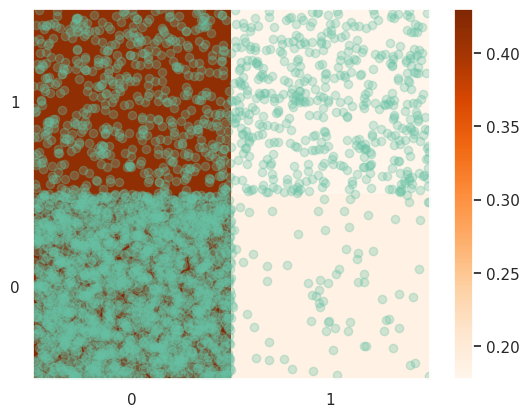

In [115]:
x1_grid, x2_grid = np.meshgrid(np.linspace(0, 1, 2), 
                               np.linspace(0, 1, 2))
ravel_grid = np.array([x1_grid, x2_grid]).reshape((2, 4)).T
prob_grid = model.predict_proba(ravel_grid)[:, 1].reshape((2, 2))

plt.pcolormesh(x1_grid, x2_grid, prob_grid, cmap='Oranges')
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
cl1_val = data[data['y'] == 1]
plt.scatter(cl1_val['x1'] + sps.uniform(loc=-0.5, scale=1).rvs(cl1_val['x1'].shape), cl1_val['x2'] + sps.uniform(loc=-0.5, scale=1).rvs(cl1_val['x1'].shape), alpha=0.3)

Почему результаты не совпадают?

Для ответа на этот вопрос распишите формулу, которая задает модель логистической регрессии, указав все параметры. Какое предположение о данных при этом делает логистическая регрессия?

Предложите и реализуйте способ обучить логистическую регрессию чтобы она точнее предсказывала частоты, посчитанные ранее.

Можно увидеть, что частота класса 1 среди объектов, имеющих одинаковые значения признака, существенно выше, чем для тех, которые имеют различное. Это наводит на мысль использовать в качестве одного из признаков равенство (или неравенство) признаков между собой. Это можно выразить через сумму исходных признаков по модулю 2.

Text(0, 0.5, '(x1 + x2) % 2')

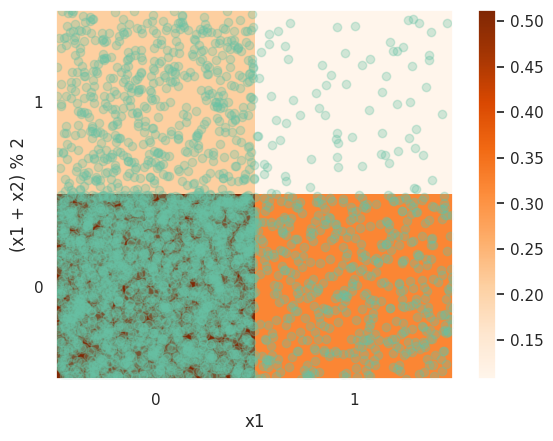

In [120]:
data['x3'] = (data['x1'] + data['x2']) % 2
model.fit(data[['x1', 'x3']], data['y'])
x1_grid, x3_grid = np.meshgrid(np.linspace(0, 1, 2), 
                               np.linspace(0, 1, 2))
ravel_grid = np.array([x1_grid, x3_grid]).reshape((2, 4)).T
prob_grid = model.predict_proba(ravel_grid)[:, 1].reshape((2, 2))

plt.pcolormesh(x1_grid, x3_grid, prob_grid, cmap='Oranges')
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
cl1_val = data[data['y'] == 1]
plt.scatter(cl1_val['x1'] + sps.uniform(loc=-0.5, scale=1).rvs(cl1_val['x1'].shape), cl1_val['x3'] + sps.uniform(loc=-0.5, scale=1).rvs(cl1_val['x1'].shape), alpha=0.3)
plt.xlabel('x1')
plt.ylabel('(x1 + x2) % 2')

Сделайте вывод по этой и предыдущей задачам.

---
### Задача 5.

**1.** Реализуйте логистическую регрессию с регуляризацией для трех вариантов поиска оценки параметров:
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск с размером батча 5-10;
* IRLS.

Для измерения времени работы **каждого** шага используйте 

`from time import time`

*Замечания.* 

1. Для чистоты эксперимента время шага внутри цикла нужно замерять от конца предыдущего шага до конца текущего, а не от начала текущего шага.
2. Иногда при подсчете сигмоиды и оптимизируемого функционала могут возникать вычислительные ошибки. Для их избежания существуют специальные трюки.
    * [How to Evaluate the Logistic Loss and not NaN trying](http://fa.bianp.net/blog/2019/evaluate_logistic/)
    * [The log-sum-exp trick in Machine Learning](https://www.xarg.org/2016/06/the-log-sum-exp-trick-in-machine-learning/)
    * [Exp-normalize trick](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)<br>
3. Трюки не обязательно реализовывать самостоятельно, можете воспользоваться функциями для них из `scipy`, `numpy`: 
    * [`scipy.special.logsumexp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html);
    * [`numpy.logaddexp`](https://numpy.org/doc/stable/reference/generated/numpy.logaddexp.html).
4. В методе IRLS можно добавить малый регуляризатор, даже если регуляризации нет, для исключения вычислительных проблем.
5. Следите за качеством кода, комментируйте логические этапы кода. Несоблюдение этого требования может привести к потере баллов.

In [315]:
from scipy.special import logsumexp
from time import time

class LogisticRegression():
    '''
    Модель логистической регрессии. Имеет следующие гиперпараметры:
    
    :param alpha: параметр регуляризации. 
                     Если равно 0, то регуляризация не происходит.
    :param lr: константа, на которую домножаем градиент при обучении
    :param eps: ограничение на норму невязки в случае
                   если используется критерий criterion='eps'
    :param max_iter: ограничение на кол-во итераций в случае 
                        если используется критерий criterion='max_iter'
    :param method: если равно 'gd', то используется обычный градиентный спуск,
                   если равно 'sgd', то используется стохастический 
                        градиентный спуск,
                   если равно 'irls', то используется метод IRLS.
    :param criterion: если равно 'eps', то используем ограничение 
                        на норму невязки,
                      если равно 'max_iter', то используем ограничение 
                        на количество итераций
    :param fit_intercept: указывает, следует ли добавить константу в признаки
    :param save_history: указывает, следует ли сохранять историю обучения
    '''
    
    def __init__(
        self,
        alpha=0,
        lr=0.5,
        eps=1e-3,
        max_iter=1e5,
        method='gd',
        criterion='max_iter',
        fit_intercept=True,
        save_history=True,
    ):
        '''Создает модель и инициализирует параметры.'''
        
        criterion_error_msg = 'выбран неправильный критерий остановки'
        assert criterion in ['max_iter', 'eps'], criterion_error_msg
        
        method_error_msg = 'выбран неправильный метод'
        assert method in ['gd', 'sgd', 'irls'], method_error_msg

        self.alpha = alpha
        self.lr = lr
        self.eps = eps
        self.max_iter = max_iter
        self.criterion = criterion
        self.method = method
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history = []  # для хранения истории обучения

        
    @staticmethod
    def _sigmoid(x):
        return np.exp(-logsumexp([np.zeros(x.shape), -x], axis=0))

    
    def _log_likelihood(self, X, y):
        return np.sum(logsumexp(np.hstack((np.zeros(y.shape), -X)), axis=-1, b=np.hstack((y, np.ones(y.shape) - y))) - \
            logsumexp(np.hstack((np.zeros(y.shape), -X)), axis=-1))

    
    def _add_intercept(self, X):
        '''
        Добавляем свободный коэффициент к нашей модели. 
        Это происходит путем добавления вектора из 1 к исходной матрице.
        
        :param X: исходная матрица признаков
        :return: матрица X с добавленным свободным коэффициентов
        '''
        
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1)
        X_copy[:, :-1] = X

        return X_copy

    
    def fit(self, X, Y):
        '''
        Обучает модель логистической регресии с помощью выбранного метода,
        пока не выполнится критерий остновки self.criterion.
        Также, в случае self.save_history=True, добавляет в self.history 
        текущее значение оптимизируемого функционала 
        и время обновления коэффициентов. 
        
        :param X: матрица признаков
        :param Y: истинные метки
        '''
        
        assert X.shape[0] == Y.shape[0]

        if self.fit_intercept:  # добавляем свободный коэфициент
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()
        
        def g(theta, X, y):
            def expit_b(x, b):
                idx = x < 0
                out = np.zeros_like(x)
                exp_x = np.exp(x[idx])
                b_idx = b[idx]
                out[idx] = ((1 - b_idx) * exp_x - b_idx) / (1 + exp_x)
                exp_nx = np.exp(-x[~idx])
                b_nidx = b[~idx]
                out[~idx] = ((1 - b_nidx) - b_nidx * exp_nx) / (1 + exp_nx)
                return out
            z = X @ theta
            s = expit_b(z, y)
            return X.T @ s / X.shape[0]

        self.coef_ = np.zeros(X_copy.shape[1])
        self.n_iter_ = 0
        while True:
            sample = np.arange(0, X_copy.shape[0])
            if self.method == 'sgd':
                sample = np.random.choice(sample, size=(5, ))
            X_sample = X_copy[sample, :]
            Y_sample = Y[sample]
            # Вычисляем градиент
            grad = g(self.coef_, X_sample, Y_sample)
            # Проверяем условия останова 
            if self.criterion == 'eps':
                if np.linalg.norm(self.lr * grad) < self.eps:
                    break
            elif self.criterion == 'max_iter':
                if self.n_iter_ >= self.max_iter:
                    break
            # Изменеяем коэффициенты
            self.coef_ -= self.lr * grad - 2 * self.alpha * self.coef_
            print(self.coef_)
            # Сохраняем историю обучения при необходимости
            if self.save_history:
                self.history.append((self._log_likelihood(X_copy @ self.coef_, Y), time()))
            self.n_iter_ += 1

        self.intercept_ = self.coef_[-1] if self.fit_intercept else 0.0
        
        return self

        
    def predict(self, X):
        '''
        Применяет обученную модель к данным 
        и возвращает точечное предсказание (оценку класса).
        
        :param X: матрица признаков
        :return: предсказание с размерностью (n_test, )
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.coef_.shape[0]

        predictions = (self._sigmoid(X_copy @ self.coef_) * 2.0).astype(int)
        
        return predictions

        
    def predict_proba(self, X):
        '''
        Применяет обученную модель к данным
        и возвращает предсказание вероятности классов 0 и 1.
        
        :param X: матрица признаков
        :return: вероятности предсказания с размерностью (n_test, 2)
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.coef_.shape[0]

        probs = self._sigmoid(X_copy @ self.coef_).reshape((-1, 1))
        prob_predictions = np.hstack((1 - probs, probs))

        return prob_predictions

Рассмотрим игрушечный датасет на $30$ признаков `load_breast_cancer` из библиотеки `sklearn`. Это относительно простой для бинарной классификации датасет по диагностике рака молочной железы.

Ради интереса можно прочитать описание признаков.

In [121]:
dataset = load_breast_cancer()
dataset['DESCR'].split('\n')[11:31]

[':Attribute Information:',
 '    - radius (mean of distances from center to points on the perimeter)',
 '    - texture (standard deviation of gray-scale values)',
 '    - perimeter',
 '    - area',
 '    - smoothness (local variation in radius lengths)',
 '    - compactness (perimeter^2 / area - 1.0)',
 '    - concavity (severity of concave portions of the contour)',
 '    - concave points (number of concave portions of the contour)',
 '    - symmetry',
 '    - fractal dimension ("coastline approximation" - 1)',
 '',
 '    The mean, standard error, and "worst" or largest (mean of the three',
 '    worst/largest values) of these features were computed for each image,',
 '    resulting in 30 features.  For instance, field 0 is Mean Radius, field',
 '    10 is Radius SE, field 20 is Worst Radius.',
 '',
 '    - class:',
 '            - WDBC-Malignant',
 '            - WDBC-Benign']

Разделим нашу выборку на обучающую и тестовую:

In [292]:
X, Y = dataset['data'], dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

При использовании регуляризации данные необходимо нормализовать. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`. 

In [293]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**2.** Теперь обучите три модели логистической регрессии без регуляризации с помощью методов
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск;
* IRLS.

Постройте график, на котором нанесите три кривые обучения, каждая из которых отображает зависимость оптимизируемого функционала от номера итерации метода. **Функционал должен быть одинаковый для всех моделей: логарифм функции правдоподобия без минусов**. Нарисуйте также график зависимости этого функционала от времени работы метода. Сделайте выводы. Что будет при обучении на датасете, в котором больше строк, а число столбцов останется прежним?

*Замечания:* 
* Все графики должны быть информативны, с подписанными осями и т.д..
* Для чистоты эксперимента желательно не запускать в момент обучения другие задачи и провести обучение несколько раз, усреднив результаты.

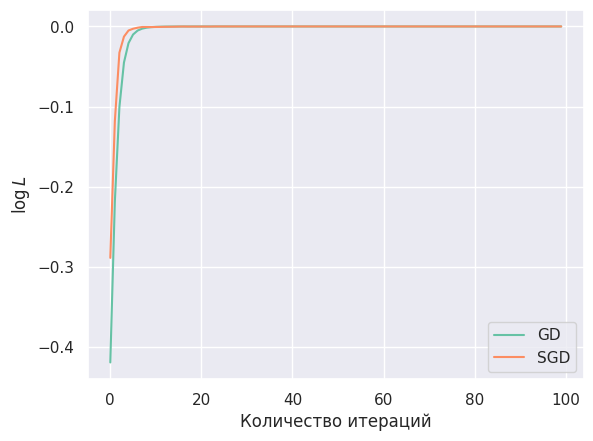

In [278]:
gd_model = LogisticRegression(method='gd', max_iter=100)
sgd_model = LogisticRegression(method='sgd', max_iter=100)
gd_model.fit(X_train, Y_train)
plt.plot(list(map(lambda x: x[0], gd_model.history)), label='GD')
sgd_model.fit(X_train, Y_train)
plt.plot(list(map(lambda x: x[0], sgd_model.history)), label='SGD')
plt.legend()
plt.xlabel('Количество итераций')
plt.ylabel('$\log L$')
plt.show()

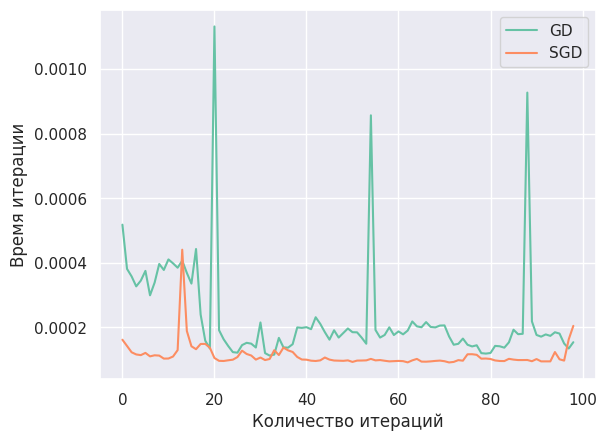

In [325]:
times_gd = []
for i in range(1, len(gd_model.history)):
    times_gd.append(gd_model.history[i][1] - gd_model.history[i - 1][1])
times_sgd = []
for i in range(1, len(sgd_model.history)):
    times_sgd.append(sgd_model.history[i][1] - sgd_model.history[i - 1][1])
plt.plot(times_gd, label='GD')
plt.plot(times_sgd, label='SGD')
plt.legend()
plt.xlabel('Количество итераций')
plt.ylabel('Время итерации')
plt.show()

**3.** Сравните два реализованных критерия остановки по количеству проведенных итераций: 
* евклидова норма разности текущего и нового векторов весов стала меньше, чем $10^{-4}$;
* ограничение на число итераций (например, $10000$). 

Используйте градиентный спуск.

In [279]:
iter_model = LogisticRegression(max_iter=10000, criterion='max_iter', method='gd')
eps_model = LogisticRegression(eps=1e-4, criterion='eps', method='gd')
iter_model.fit(X_train, Y_train)
eps_model.fit(X_train, Y_train)
print('Ограничение итераций:', len(iter_model.history))
print('Норма разности:', len(eps_model.history))

Ограничение итераций: 10000
Норма разности: 53424


**4.** Рассмотрите как влияет размер шага (`learning rate`) на качество модели. Обучите каждую модель одинаковое число итераций (например, 10000), а затем посчитайте качество. Воспользуйтесь ограничением на число итераций в качестве критерия остановки, так как для больших `learning rate` у вас может не сойтись модель. Используйте стохастический градиентный спуск. Сделайте выводы.

In [280]:
lrs = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10]

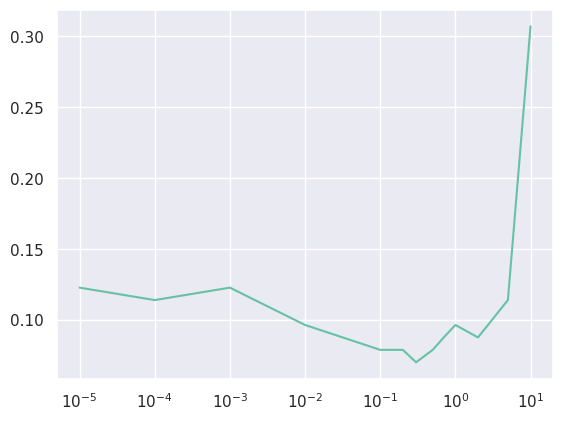

In [281]:
from sklearn.metrics import mean_squared_error
quality = []
for lr in lrs:
    model = LogisticRegression(max_iter=1000, criterion='max_iter', method='sgd', lr=lr)
    model.fit(X_train, Y_train)
    quality.append(mean_squared_error(Y_test, model.predict(X_test)))
plt.plot(lrs, quality)
plt.xscale('log')
plt.show()

Постройте кривые обучения для различных `learning rate`. Не обязательно рассматривать все `learning rate`, так как их слишком много, и график будет нагроможден. Возьмите около половины из них. Какой `learning rate` лучше выбрать? Чем плохи маленькие и большие `learning rate`?

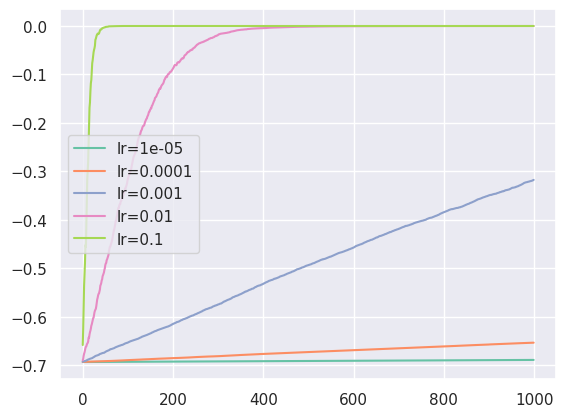

In [282]:
lrs = lrs[:5]
for lr in lrs:
    model = LogisticRegression(max_iter=1000, criterion='max_iter', method='sgd', lr=lr)
    model.fit(X_train, Y_train)
    plt.plot(list(map(lambda x: x[0], model.history)), label=f'lr={lr}')
plt.legend()
plt.show()

**5.** Рассмотрите несколько моделей, полученные при помощи GD, в которых установите не менее 5-ти различных коэффициентов регуляризации, а также модель без регуляризатора. Сравните, влияет ли наличие регуляризации на скорость сходимости и качество, сделайте выводы. Под качеством подразумевается значение какой-либо выбранной вами метрики качества классификации.

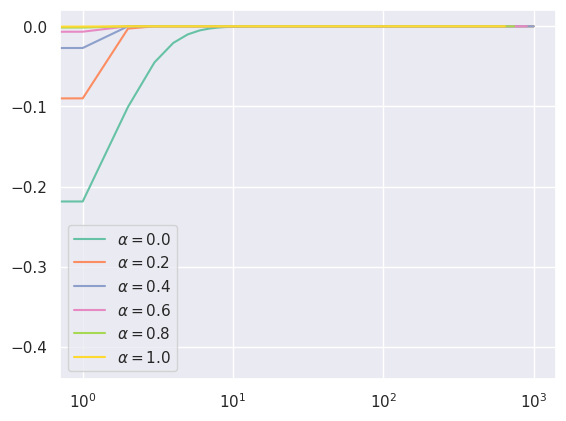

In [284]:
alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
for alpha in alphas:
    model = LogisticRegression(max_iter=1000, criterion='max_iter', method='gd', alpha=alpha)
    model.fit(X_train, Y_train)
    plt.plot(list(map(lambda x: x[0], model.history)), label=f'$\\alpha={alpha}$')
plt.xscale('log')
plt.legend()
plt.show()

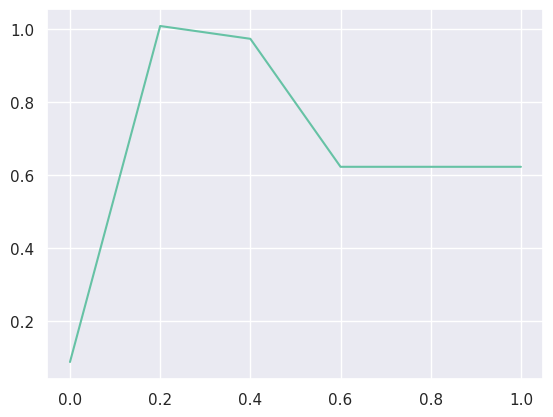

In [285]:
quality = []
for alpha in alphas:
    model = LogisticRegression(max_iter=1000, criterion='max_iter', method='gd', alpha=alpha)
    model.fit(X_train, Y_train)
    quality.append(mean_squared_error(Y_test, model.predict(X_test)))
plt.plot(alphas, quality)
plt.show()

**6.** Возьмите лучшую модель с предыдущего шага. В исходной выборке оставьте только два произвольных признака и обучите на них модель без использования свободного параметра. Визуализируйте предсказания вероятностей класса $1$ для модели.

[-0.09775177 -0.1268201 ]
[-0.27928219 -0.35538132]
[-0.54874912 -0.88522849]
[-1.24271515 -2.01373722]
[-2.55825606 -4.48820708]
[-5.63550707 -9.87699264]
[-12.36293105 -21.71985422]
[-27.06140707 -47.80404915]
[ -59.4470246  -105.16617053]
[-130.70784365 -231.38803156]


Text(0.5, 1.0, 'Предсказание вероятности класса')

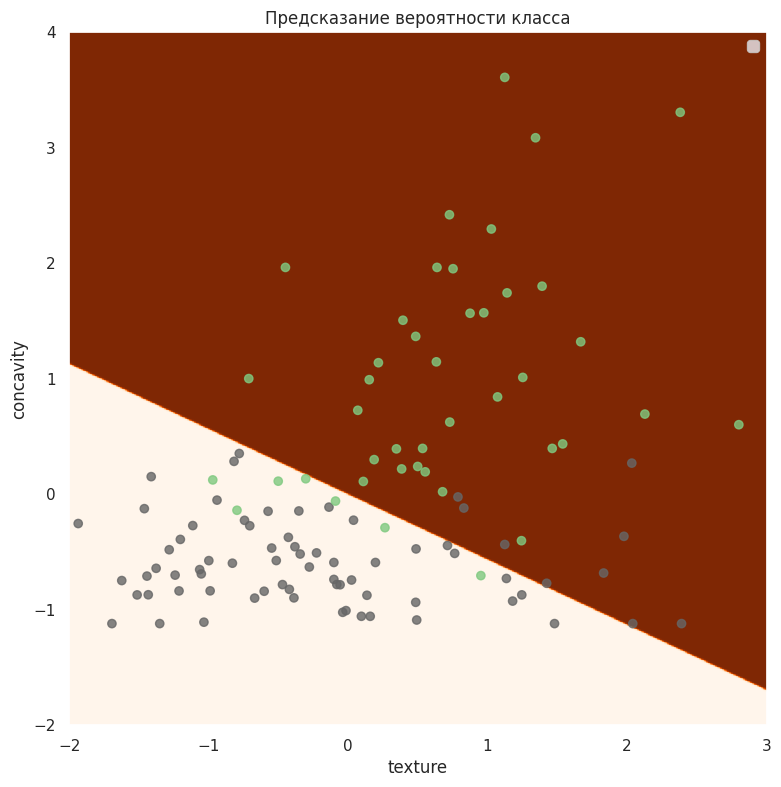

In [320]:
features = ['texture', 'concavity']
X_train_copy = X_train[:, [1, 6]]
X_test_copy = X_test[:, [1, 6]]
model = LogisticRegression(max_iter=10, criterion='max_iter', method='sgd', alpha=0.6, lr=0.3, fit_intercept=False)
model.fit(X_train_copy, Y_train)
x0_grid, x1_grid = np.meshgrid(np.linspace(-2, 3, 1001), 
                               np.linspace(-2, 4, 1001))
ravel_grid = np.array([x0_grid, x1_grid]).reshape((2, 1001*1001)).T
prob_grid = model.predict_proba(ravel_grid)
prob_grid = prob_grid[:, 0].reshape((1001, 1001))
plt.figure(figsize=(9, 9))
plt.pcolormesh(x0_grid, x1_grid, prob_grid, cmap='Oranges')
plt.scatter(X_test[:, 1], X_test[:, 6], c=Y_test, alpha=0.8, cmap='Accent')
plt.xlim((-2, 3))
plt.ylim((-2, 4))
plt.xlabel('texture'), plt.ylabel('concavity')
plt.title('Предсказание вероятности класса')

**Вывод:** Построенная нами модель крайне склонна к переобучению, так что при большом количестве итераций она неизбежно перестаёт правильно определять классы на тестовых данных. В остальном модель достаточно точно производит классификацию с подобранными параметрами. При слишком большом learning rate мы имеем сильное ухудшение точности, как и при выборе малых коэффициентов регуляризации. SGD работает быстрее GD, но на наших данных незначительно.